In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv(r"C:\Users\ksoum\Downloads\skillcraf\Task 4\traffic_accidents.csv")
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,06/01/2018 03:30:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,15,6,6
1,07/19/2018 11:43:00 AM,TRAFFIC SIGNAL,CLOUDY/OVERCAST,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,11,5,7
2,07/04/2024 10:40:00 AM,TRAFFIC SIGNAL,CLOUDY/OVERCAST,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,10,5,7
3,10/13/2018 03:00:00 PM,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,ALLEY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,15,7,10
4,07/18/2024 01:36:00 PM,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,Y-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,INCAPACITATING INJURY,1.0,0.0,1.0,0.0,0.0,2.0,13,5,7


In [41]:
df.isnull().sum()

crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104653 entries, 0 to 104652
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     104653 non-null  object 
 1   traffic_control_device         104653 non-null  object 
 2   weather_condition              104653 non-null  object 
 3   lighting_condition             104653 non-null  object 
 4   first_crash_type               104653 non-null  object 
 5   trafficway_type                104653 non-null  object 
 6   alignment                      104653 non-null  object 
 7   roadway_surface_cond           104653 non-null  object 
 8   road_defect                    104653 non-null  object 
 9   crash_type                     104653 non-null  object 
 10  intersection_related_i         104653 non-null  object 
 11  damage                         104653 non-null  object 
 12  prim_contributory_cause       

In [48]:

# Convert crash_date to datetime with explicit format
df['crash_date'] = pd.to_datetime(
    df['crash_date'],
    format='%m/%d/%Y %I:%M:%S %p',
    errors='coerce'
)

# Extract time features
df['year'] = df['crash_date'].dt.year
df['month'] = df['crash_date'].dt.month
df['day_of_week'] = df['crash_date'].dt.day_name()
df['hour'] = df['crash_date'].dt.hour

# Replace 'UNKNOWN' with NaN for easier handling
df.replace("UNKNOWN", pd.NA, inplace=True)

print("✅ Data cleaned and features extracted!")
print(df[['crash_date', 'year', 'month', 'day_of_week', 'hour']].head())

✅ Data cleaned and features extracted!
           crash_date  year  month day_of_week  hour
0 2018-06-01 15:30:00  2018      6      Friday    15
1 2018-07-19 11:43:00  2018      7    Thursday    11
2 2024-07-04 10:40:00  2024      7    Thursday    10
3 2018-10-13 15:00:00  2018     10    Saturday    15
4 2024-07-18 13:36:00  2024      7    Thursday    13


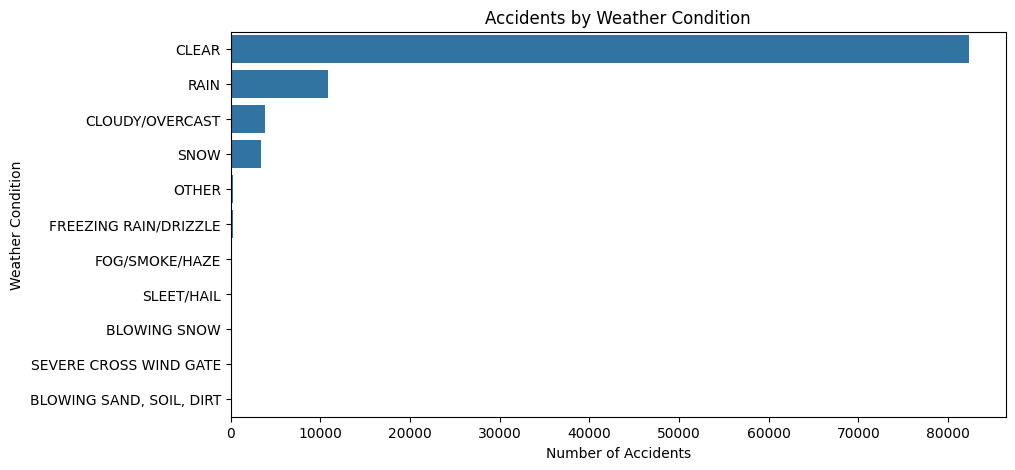

In [50]:
# 1. Accidents by Weather
plt.figure(figsize=(10,5))
sns.countplot(y="weather_condition", data=df, order=df['weather_condition'].value_counts().index)
plt.title("Accidents by Weather Condition")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.show()

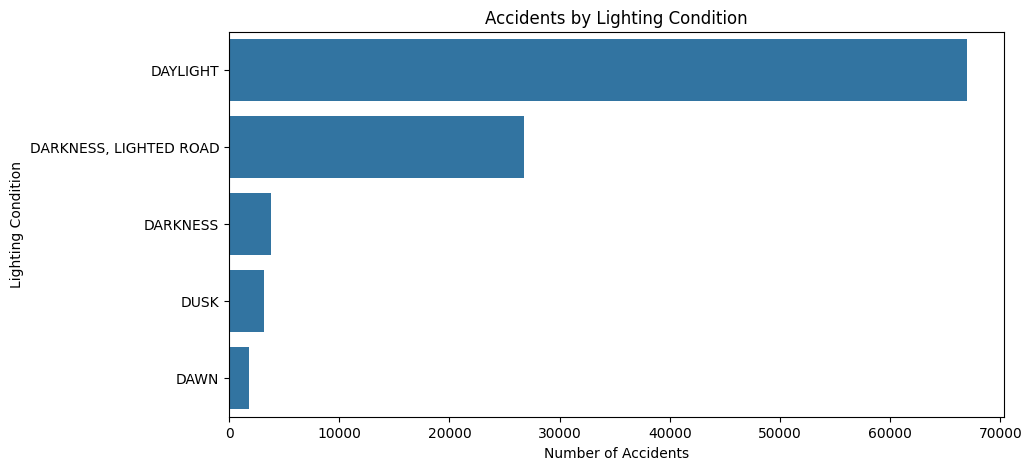

In [52]:
# 2. Accidents by Lighting Condition
plt.figure(figsize=(10,5))
sns.countplot(y="lighting_condition",data=df,order=df['lighting_condition'].value_counts().index)
plt.title("Accidents by Lighting Condition")
plt.xlabel("Number of Accidents")
plt.ylabel("Lighting Condition")
plt.show()

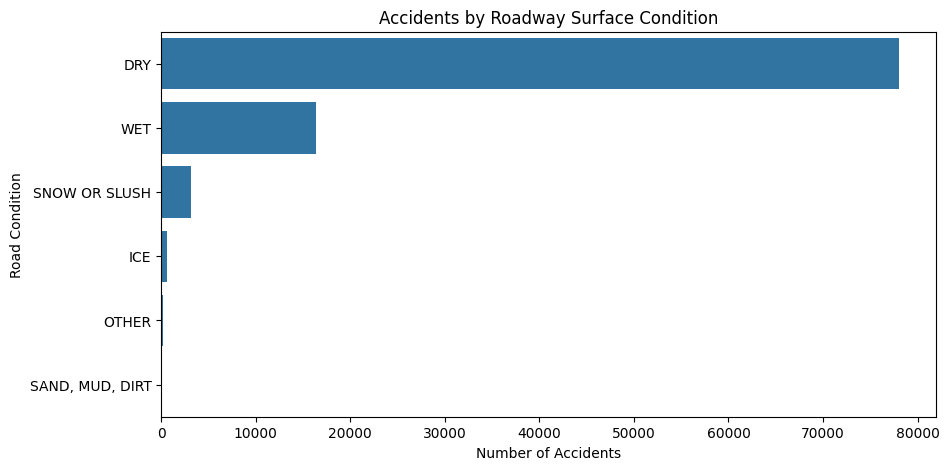

In [54]:
# 3. Accidents by Road Surface Condition
plt.figure(figsize=(10,5))
sns.countplot(y='roadway_surface_cond',data=df,order=df['roadway_surface_cond'].value_counts().index)
plt.title("Accidents by Roadway Surface Condition")
plt.xlabel("Number of Accidents")
plt.ylabel("Road Condition")
plt.show()

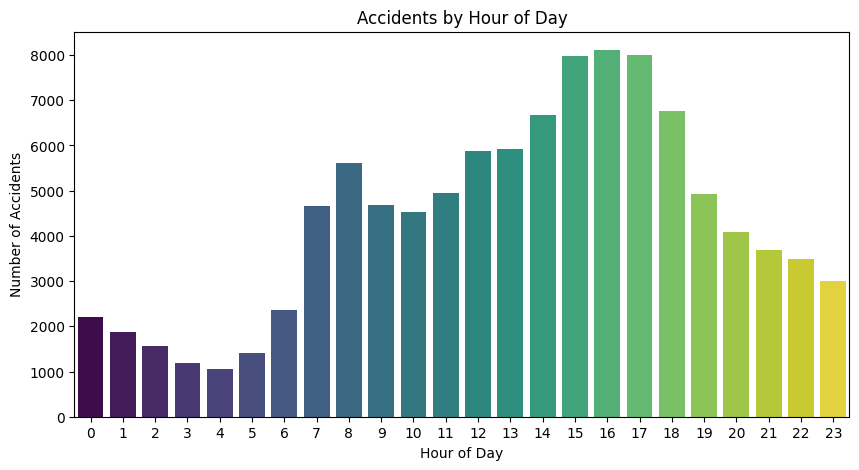

In [58]:
# 4. Accidents by Time of Day (Hour)
plt.figure(figsize=(10,5))
sns.countplot(x='hour', data=df, hue='hour', palette='viridis', legend=False)
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.show()

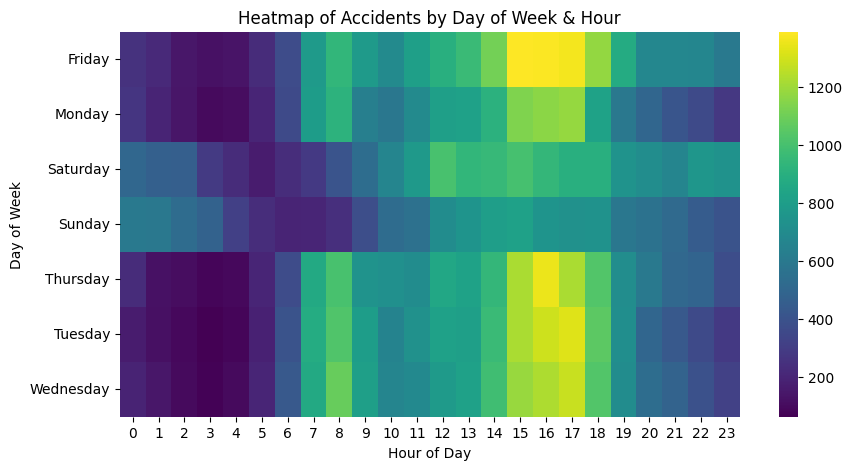

In [60]:
# 5. Heatmap: Accidents by Hour vs Day of Week
pivot_table = df.pivot_table(index='day_of_week',columns='hour',values='crash_type',aggfunc='count')
plt.figure(figsize=(10,5))
sns.heatmap(pivot_table,cmap='viridis')
plt.title("Heatmap of Accidents by Day of Week & Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()


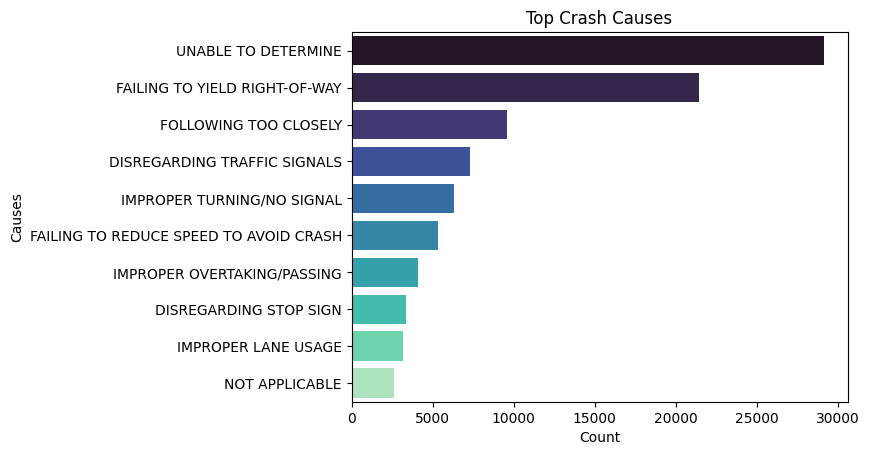

In [68]:
# 6. Primary Contributing Factors

# Generate color list
colors = sns.color_palette("mako", n_colors=len(top_causes))

# Create barplot (single color first)
ax = sns.barplot(y=top_causes.index, x=top_causes.values, color="grey")

# Recolor each bar manually
for bar, new_color in zip(ax.patches, colors):
    bar.set_facecolor(new_color)

plt.xlabel("Count")
plt.ylabel("Causes")
plt.title("Top Crash Causes")
plt.show()